## Euclidean Transformation

# ***Euclidean transformations consist of rotation and translation without scaling:***

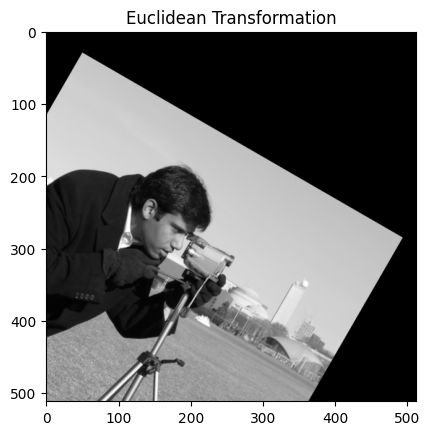

In [1]:
import cv2
import numpy as np
from skimage import data, transform
import matplotlib.pyplot as plt

image = data.camera()
theta = np.deg2rad(30) # rotation angle
tx, ty = 50, 30         # translation

# Build Euclidean transformation matrix
euclidean_matrix = np.array([[np.cos(theta), -np.sin(theta), tx],
                             [np.sin(theta),  np.cos(theta), ty]])
euclidean_tform = transform.EuclideanTransform(rotation=theta, translation=(tx, ty))

# Apply transformation
transformed_image = transform.warp(image, inverse_map=euclidean_tform.inverse)
plt.imshow(transformed_image, cmap='gray')
plt.title("Euclidean Transformation")
plt.show()

# Similarity Transformation

## ***Similarity additionally allows uniform scaling:***

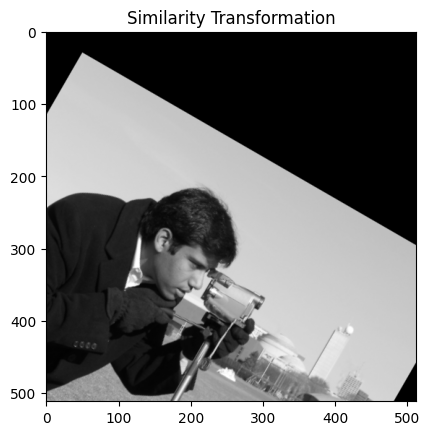

In [2]:
scale = 1.2
similarity_tform = transform.SimilarityTransform(scale=scale, rotation=theta, translation=(tx, ty))
transformed_image = transform.warp(image, inverse_map=similarity_tform.inverse)
plt.imshow(transformed_image, cmap='gray')
plt.title("Similarity Transformation")
plt.show()

# Affine Transformation
# ***Affine transformations allow non-uniform scaling and shearing:***

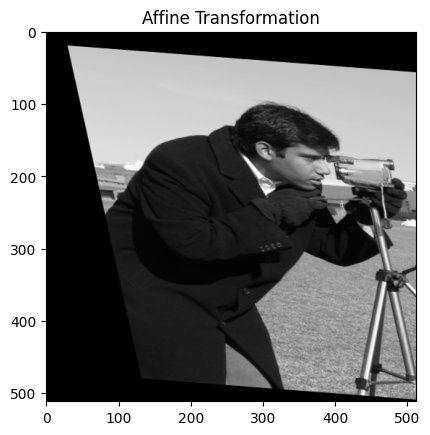

In [3]:
affine_matrix = np.array([[1.3, 0.2, 30],
                          [0.1, 0.9, 20]])
affine_tform = transform.AffineTransform(matrix=np.vstack([affine_matrix, [0, 0, 1]]))
transformed_image = transform.warp(image, inverse_map=affine_tform.inverse)
plt.imshow(transformed_image, cmap='gray')
plt.title("Affine Transformation")
plt.show()

# Projective Transformation

# ***Projective transformations (homographies) can change parallelism:***

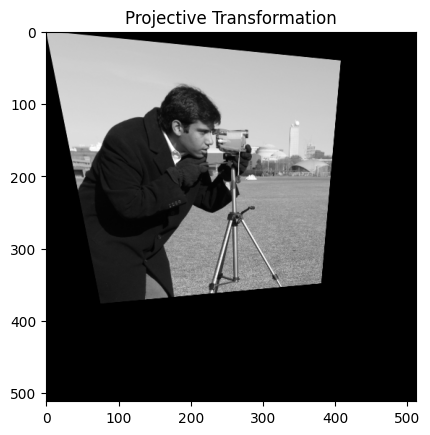

In [4]:
# Example projective (homography) matrix:
projective_matrix = np.array([[1, 0.2, 0],
                              [0.1, 1, 0],
                              [0.0005, 0.0007, 1]])
projective_tform = transform.ProjectiveTransform(matrix=projective_matrix)
transformed_image = transform.warp(image, inverse_map=projective_tform.inverse)
plt.imshow(transformed_image, cmap='gray')
plt.title("Projective Transformation")
plt.show()